In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

import sys

from src.run_gsort_v2_wuericmod import *
import argparse
from scipy.io import loadmat
from itertools import product
import tqdm
import logging
import re
import src.utilities.electrode_map as emap

%load_ext autoreload
%autoreload 2

/Volumes/Lab/Users/jeffbrown/g-sort/src/utilities/electrode_map.py:1448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LITKE_512_ARRAY_ADJ_MAT = np.array([
/Volumes/Lab/Users/jeffbrown/g-sort/src/utilities/electrode_map.py:3443: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LITKE_519_ARRAY_ADJ_MAT = np.array([


/Volumes/Lab/Users/jeffbrown/g-sort/src/utilities/visionloader.py


In [2]:
ANALYSIS_BASE = '/Volumes/Analysis'

dataset = '2019-06-20-0'

vstim_datarun = "kilosort_data000/data000"
estim_datarun = "data001"

vstim_analysis_path = os.path.join(ANALYSIS_BASE, dataset, vstim_datarun)
estim_analysis_path = os.path.join(ANALYSIS_BASE, dataset, estim_datarun)
pattern_path = os.path.join(estim_analysis_path, 'pattern_files')

vstim_data = vl.load_vision_data(vstim_analysis_path,
                                 vstim_datarun.rsplit('/')[-1],
                                 include_params=True,
                                 include_ei=True,
                                 include_noise=True,
                                 include_neurons=True)
noise = vstim_data.channel_noise
duplicates, cell_ei = compute_duplicates(vstim_data, noise)
# duplicates = []

/Volumes/Analysis/2019-06-20-0/kilosort_data000/data000


/tmp/ipykernel_14515/1243973278.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


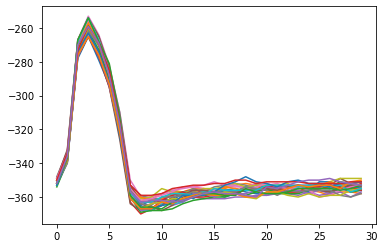

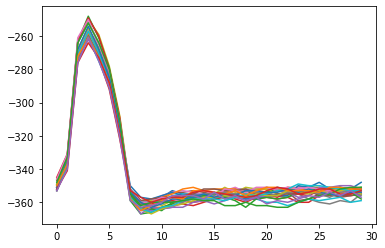

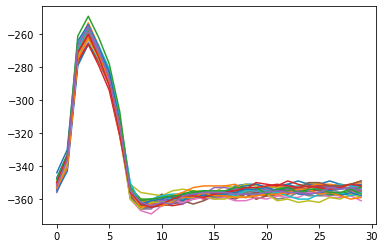

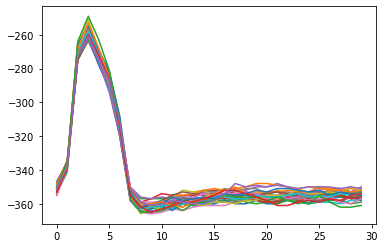

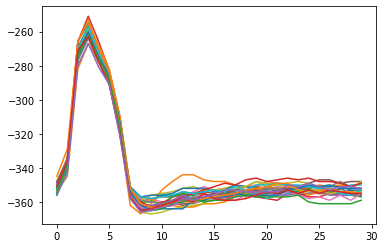

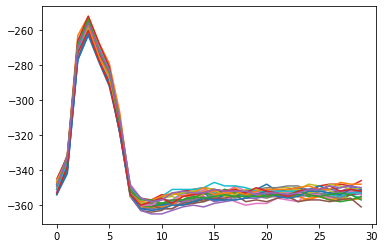

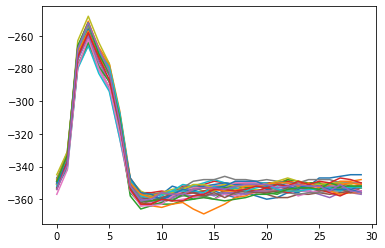

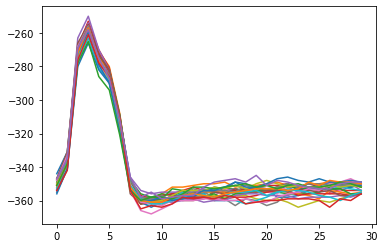

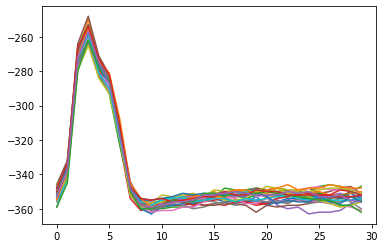

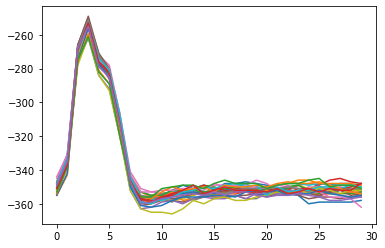

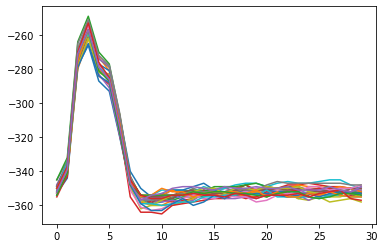

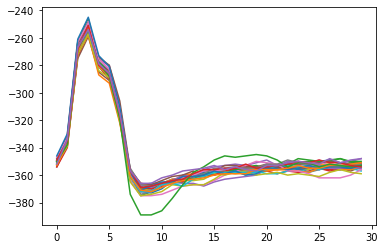

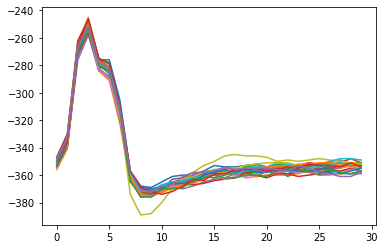

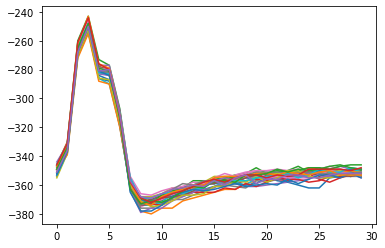

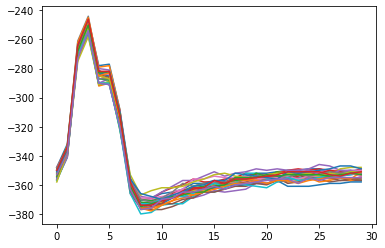

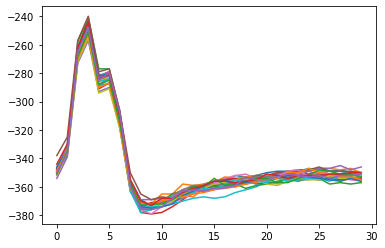

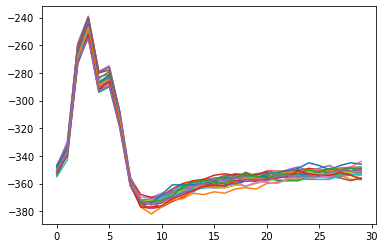

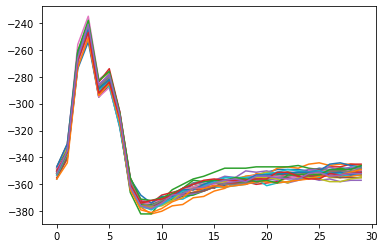

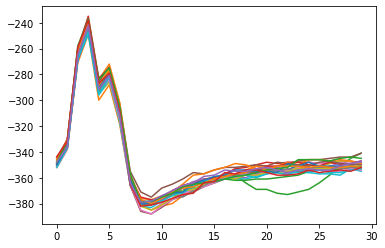

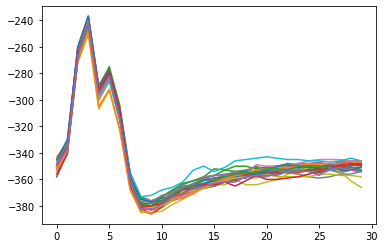

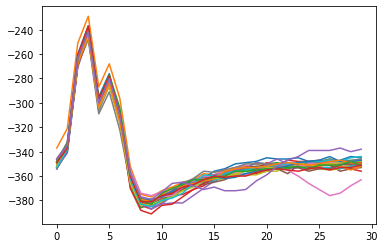

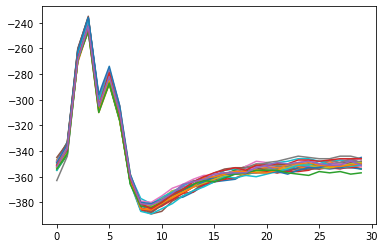

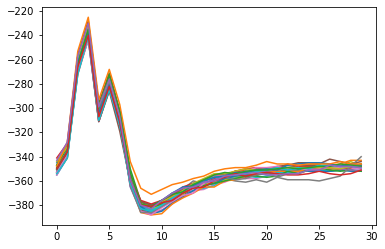

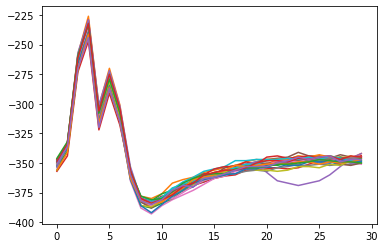

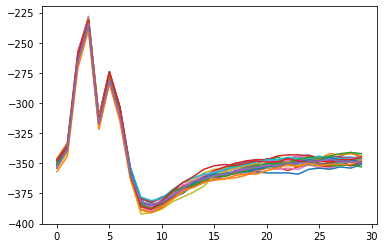

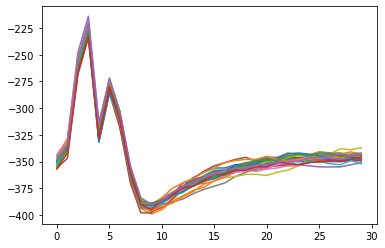

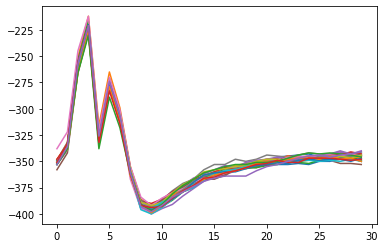

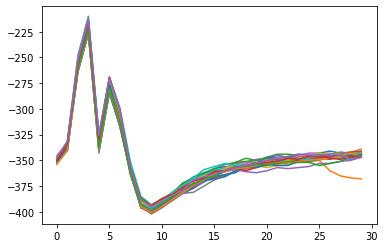

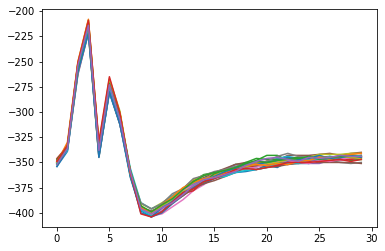

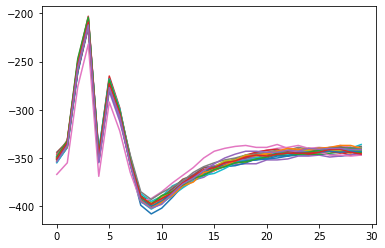

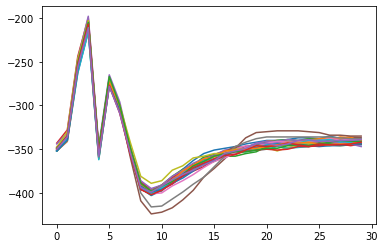

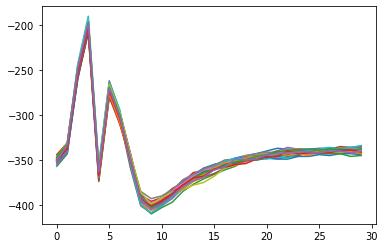

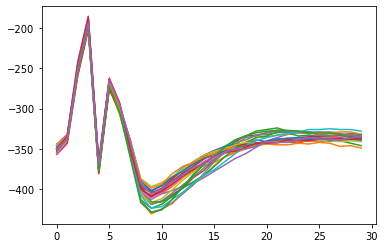

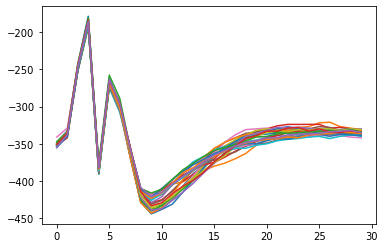

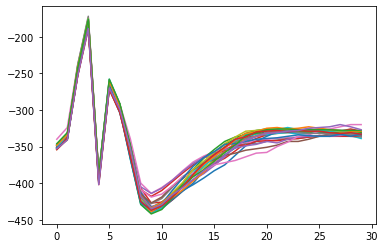

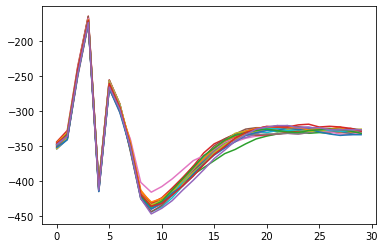

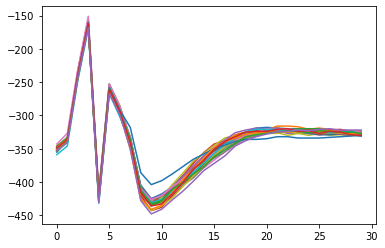

In [31]:
cell = 309

p = 250

for k in range(37):
    signal = get_oldlabview_pp_data(estim_analysis_path , p, k)

    plt.figure()
    ax = plt.subplot(111)
    ax.plot(signal[:,p-1,:30].T);